In [2]:
import feather
import pandas as pd

path = './SH600000.feather'
df = feather.read_dataframe(path)
# feather.write_dataframe(df, output_path)

In [2]:
df.head()

,date,open,high,low,close,preClose,preClose2,amount,vwap
0,2010-01-04 09:31:00,21.83,21.87,21.83,21.84,21.69,21.69,29328174.0,21.843743
1,2010-01-04 09:32:00,21.85,21.85,21.80,21.80,21.84,21.69,15051979.0,21.831390
2,2010-01-04 09:33:00,21.80,21.80,21.70,21.75,21.80,21.69,8075582.0,21.755339
3,2010-01-04 09:34:00,21.73,21.75,21.72,21.75,21.75,21.69,6140101.0,21.741874
4,2010-01-04 09:35:00,21.74,21.76,21.73,21.76,21.75,21.69,6250674.0,21.756610


In [8]:
df.tail()

,date,open,high,low,close,preClose,preClose2,amount,vwap
468475,2018-01-15 14:56:00,13.02,13.02,13.00,13.02,13.01,12.91,6556338.0,13.011886
468476,2018-01-15 14:57:00,13.01,13.02,13.01,13.02,13.02,12.91,2510625.0,13.017525
468477,2018-01-15 14:58:00,13.01,13.02,13.01,13.02,13.02,12.91,2121618.0,13.012070
468478,2018-01-15 14:59:00,13.02,13.02,13.00,13.00,13.02,12.91,4778787.0,13.001556
468479,2018-01-15 15:00:00,13.01,13.02,13.01,13.02,13.00,12.91,5494709.0,13.016165


In [7]:
data = df.values
print data.shape

(468480, 9)


In [6]:
data.dtypes

date          object
open         float64
high         float64
low          float64
close        float64
preClose     float64
preClose2    float64
amount       float64
vwap         float64
dtype: object

In [27]:
data.loc[(data['date']>'2010-01-05 10:16:00')
         & (data['date']<'2010-01-05 10:20:00')]

,date,open,high,low,close,preClose,preClose2,amount,vwap
286,2010-01-05 10:17:00,20.88,20.90,20.88,20.90,20.89,21.19,12196497.0,20.891567
287,2010-01-05 10:18:00,20.90,20.92,20.89,20.92,20.90,21.19,7914525.0,20.898422
288,2010-01-05 10:19:00,20.92,20.92,20.88,20.90,20.92,21.19,13759798.0,20.896113


### “聪明”程度
S_t = |R_t|/sqrt(V_t)
其中，R_t为第t分钟的涨跌幅，V_t为第t分钟的成交量。指标S_t的值越大，则表示该分钟的交易越“聪明“

In [10]:
start_date = "2016-09-30 14:30"
end_date = "2016-09-30 15:00"
data = df
valid_data = data.loc[(data['date']>start_date)
         & (data['date']<=end_date)]
print valid_data.shape
# filtering those data with nan or null
valid_data_filter = valid_data.dropna(how='any')

(30, 9)


In [11]:
# show whether there is a nan data.
na_data = pd.isna(valid_data)
na_ids = np.where(na_data.values == True)
if len(na_ids[0]) != 0:
    valid_data.iloc[na_ids[0][0]]
else:
    print "there is not nan data."

there is not nan data.


In [12]:
# R_t = abs(close-preClose2)/preClose2*100%
# V_t = amount
import numpy as np
R_elem1 = 'close'
R_elem2 = 'preClose2'
V_elem = 'amount'
R = abs(valid_data_filter[R_elem1]-valid_data_filter[R_elem2])/(valid_data_filter[R_elem2]+np.finfo(float).eps)*100
S = R/(np.sqrt(valid_data_filter[V_elem])+np.finfo(float).eps)
print S.shape

(30,)


In [13]:
S_sort_ids = np.argsort(S.values)
S_arr = S.values[S_sort_ids[::-1]]

In [15]:
# check the max, min value in S_t
print 'min:', np.min(S.values)
print 'max:', np.max(S.values)

min: 0.0
max: 8.21577163204e-05


In [21]:
# sort valid_data_filter by descending
sort_valid_data = valid_data_filter.iloc[S_sort_ids[::-1]]
sort_valid_data.tail(30)

,date,open,high,low,close,preClose,preClose2,amount,vwap
393590,2016-09-30 14:51:00,16.49,16.49,16.49,16.49,16.49,16.5,544171.0,16.490030
393597,2016-09-30 14:58:00,16.51,16.51,16.50,16.51,16.51,16.5,650030.0,16.502412
393591,2016-09-30 14:52:00,16.49,16.50,16.49,16.49,16.49,16.5,712406.0,16.490880
393592,2016-09-30 14:53:00,16.49,16.50,16.49,16.49,16.49,16.5,907109.0,16.492891
393572,2016-09-30 14:33:00,16.50,16.50,16.49,16.49,16.50,16.5,1182001.0,16.492270
393589,2016-09-30 14:50:00,16.50,16.50,16.49,16.49,16.50,16.5,1183431.0,16.493812
393577,2016-09-30 14:38:00,16.50,16.50,16.49,16.49,16.50,16.5,1193983.0,16.491478
393574,2016-09-30 14:35:00,16.50,16.50,16.49,16.49,16.50,16.5,1838911.0,16.490996
393584,2016-09-30 14:45:00,16.51,16.51,16.49,16.51,16.51,16.5,2014226.0,16.492475
393596,2016-09-30 14:57:00,16.50,16.51,16.50,16.51,16.51,16.5,2069134.0,16.500271


In [97]:
amount_cumsum = sort_valid_data['amount'].cumsum()
print type(amount_cumsum)
print amount_cumsum[:3]

<class 'pandas.core.series.Series'>
389348     644094.0
389340    3692819.0
389364    4468363.0
Name: amount, dtype: float64


[2, 2]

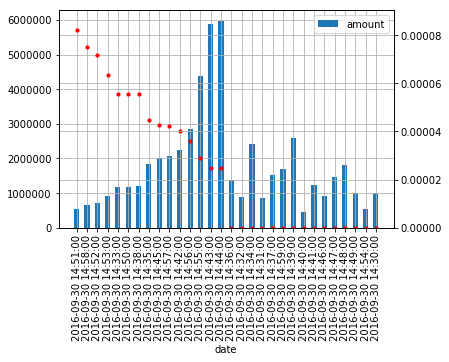

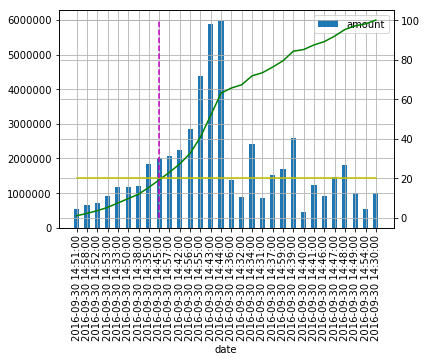

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure()
show_valid_data = pd.DataFrame(sort_valid_data['amount'].values, columns = ['amount'], index = sort_valid_data['date'])

# ax = sort_valid_data[['amount']].unstack('date').plot(kind='bar', use_index=True)
ax = show_valid_data.plot(kind='bar')
ax2 = ax.twinx()
ax2.scatter(ax.get_xticks(), S_arr, marker='o', c='red', s=10)
ax2.set_ylim((np.min(S_arr)-np.min(S_arr)*0.1, np.max(S_arr)+np.max(S_arr)*0.1))
ax.grid(True)
ax2.grid(True)

fig = plt.figure()
ax = show_valid_data.plot(kind='bar')
ax2 = ax.twinx()
amount_cumsum = sort_valid_data['amount'].cumsum()
all_amount_cumsum = amount_cumsum.values[-1]
ax2.plot(ax.get_xticks(), amount_cumsum.values/all_amount_cumsum*100, c = 'g')

# ax4 = ax3.twinx()
trade_cum_ratio = 0.2
ax2.plot(ax2.get_xticks(), [trade_cum_ratio*100]*len(ax.get_xticks()), c = 'y')
x_ids = np.where((amount_cumsum.values/all_amount_cumsum) <= trade_cum_ratio)[0]
ax2.plot([ax2.get_xticks()[x_ids[-1]]]*2, [0,100], 'm--')
ax.grid(True)
ax2.grid(True)
plt.show()

In [18]:
#成交量的累积占比
trade_cum_ratio = 0.2
amount_cumsum = sort_valid_data['amount'].cumsum()
all_amount_cumsum = amount_cumsum.values[-1]
smart_ids = np.where((amount_cumsum.values/all_amount_cumsum) <= trade_cum_ratio)[0]

# 聪明钱的情绪因子Q
# Q = VWAP_smart/VWAP_all
trade_mon = sort_valid_data['amount'].values * sort_valid_data['vwap'].values
VWAP_smart = np.sum(trade_mon[smart_ids])/np.sum(sort_valid_data['amount'].values[smart_ids])
VWAP_all = np.sum(trade_mon)/np.sum(sort_valid_data['amount'].values)
Q = VWAP_smart/VWAP_all
print "VWAP_smart:", VWAP_smart, ", VWAP_all:", VWAP_all
print "Q:", Q

VWAP_smart: 16.4926510458 , VWAP_all: 16.4959569769
Q: 0.999799591437
